In [ ]:
# Margaret Johnston
# Homework 7 - due 28 March

# Homework:
### Gravitational Potentials
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 


In [1]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy as np;

Initializing


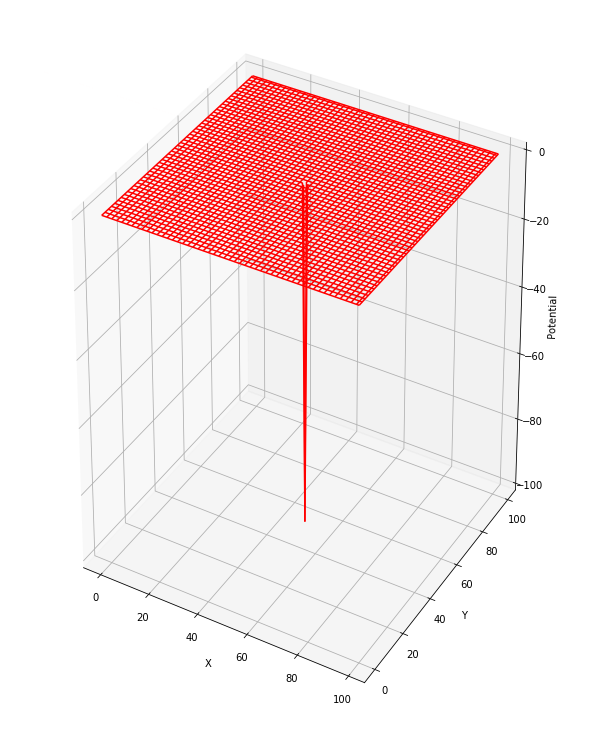

Calculating
0
10
20
30
40
50
60
70
80
90
100
110
Plotting


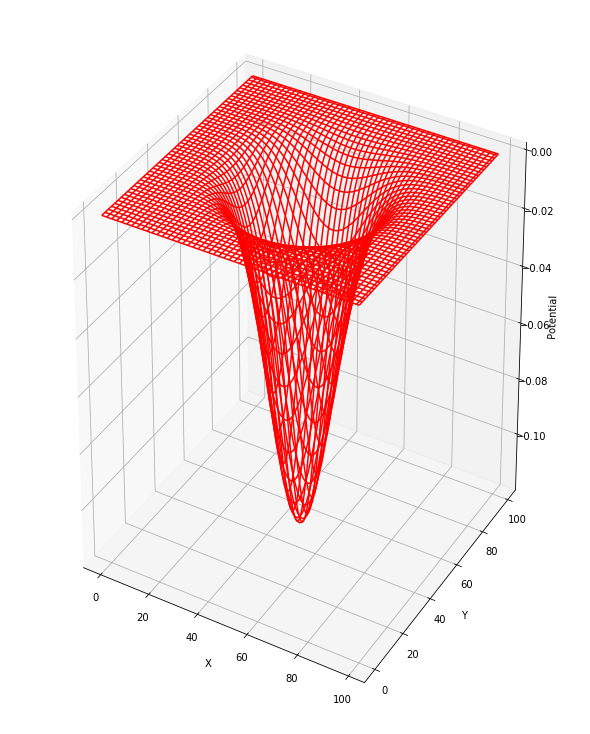

In [4]:
omega=1.1
mu = 100
print("Initializing")
Nmax = 100; Niter = 200 
V = np.zeros((Nmax, Nmax), float)  
V[50,50] = -mu     # mass at the center

x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):  
    z = V[X,Y]                        
    return z
    
# what does the original distribution look like
Z = functz(V)                          
fig = p.figure(figsize=[8,10])                       
ax = Axes3D(fig)                                     
ax.plot_wireframe(X, Y, Z, color = 'r')              
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()    

# calculating the rest of the distribution
print("Calculating")
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1/4*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<np.abs(du)):
                maxerr=np.abs(du)
            V[i,j]=V[i,j]+omega*du
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
# what does the final distribution look like
print("Plotting")
Z = functz(V)                          
fig = p.figure(figsize=[8,10])                        # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()    

When comparing the numerical calculation of the potential from the PDE to the formula 2G$\mu$*$ln(r)$, there are significant differences. 

The location of the mass becomes a discontinuity, as $r\rightarrow 0$, $ln(r)\rightarrow -\infty$. This differs from the potential because there is no longer a smooth global extremum of finite value, but a sharp discontinuity at that point.

Further from the location of the line mass, $ln(r)$ does not disappear as quickly as the actual potential. The potential has a $\frac{1}{r^2}$ dependence which is significantly different than the $ln(r)$ dependence in the comparison formula.

There may be some critical radius where the two are well matched for a range of $r$, but with these two differences, the overall behaviors do not match well.

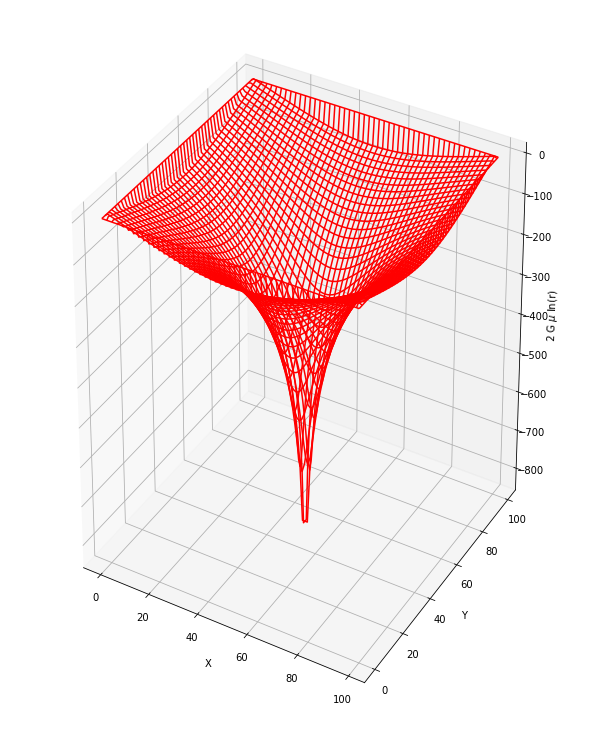

In [15]:
# checking the form of the potential
V2 = np.zeros((Nmax, Nmax), float)  

for ii in range(1, Nmax-1):                                                
    for jj in range(1,Nmax-1):
        eps = 10e-5
        const = 840
        r = np.sqrt((50-ii)**2+(50-jj)**2)
        # make an exception for the mass location
        if r<eps: 
            V2[ii,jj] = -const
        else:
            phi = 2*mu*np.log(r)-const
            V2[ii,jj] = phi
        
Z = functz(V2)                          
fig = p.figure(figsize=[8,10])
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, color = 'r')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('2 G $\mu$ ln(r)')
p.show()    